In [7]:
import pandas as pd
import seaborn as sns

In [8]:
df = pd.read_csv('data/전처리/전처리_지하철_요일_고유역번호_승하차차이_휴무일0721.csv', index_col=0)
df.head()

,수송일자,호선,고유역번호(외부역코드),역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,...,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,총 이용인원,요일,휴무일
0,2022-05-01,1호선,150,서울역,승차,184,193,328,677,1120,...,2619,2648,2409,2494,1902,669,0,33880,6,1
1,2022-05-01,1호선,150,서울역,하차,139,655,842,1066,1547,...,2626,2196,1844,1344,752,376,0,31237,6,1
2,2022-05-01,1호선,150,서울역,승하차 차이,45,-462,-514,-389,-427,...,-7,452,565,1150,1150,293,0,2643,6,1
3,2022-05-01,1호선,151,시청,승차,61,67,124,162,211,...,1257,890,861,634,387,129,0,11449,6,1
4,2022-05-01,1호선,151,시청,하차,77,250,336,652,1064,...,351,251,211,167,88,114,0,13167,6,1


In [9]:
data = df.copy()

In [10]:
data_up = data[data['승하차구분'] == '승차']
data_down = data[data['승하차구분'] == '하차']

In [11]:
data_up

,수송일자,호선,고유역번호(외부역코드),역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,...,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,총 이용인원,요일,휴무일
0,2022-05-01,1호선,150,서울역,승차,184,193,328,677,1120,...,2619,2648,2409,2494,1902,669,0,33880,6,1
3,2022-05-01,1호선,151,시청,승차,61,67,124,162,211,...,1257,890,861,634,387,129,0,11449,6,1
6,2022-05-01,1호선,152,종각,승차,211,120,115,203,200,...,2638,1989,1983,1874,1145,475,0,22293,6,1
9,2022-05-01,1호선,153,종로3가,승차,288,169,119,218,334,...,1535,1373,1211,1046,761,284,0,18389,6,1
12,2022-05-01,1호선,154,종로5가,승차,58,61,80,127,238,...,995,940,653,506,270,89,0,11863,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298380,2023-04-30,8호선,2824,단대오거리,승차,148,240,302,494,652,...,307,246,193,143,100,32,3,7192,6,1
298383,2023-04-30,8호선,2825,신흥,승차,71,83,113,226,286,...,230,162,145,92,75,27,3,3526,6,1
298386,2023-04-30,8호선,2826,수진,승차,64,108,133,247,322,...,132,139,108,82,65,31,0,3644,6,1
298389,2023-04-30,8호선,2827,모란,승차,54,82,73,124,199,...,204,175,153,148,126,70,1,3380,6,1


In [12]:
data_hap = data_up.set_index(['수송일자', '호선', '고유역번호(외부역코드)', '역명']).loc[:, '06시이전':'총 이용인원'] + \
           data_down.set_index(['수송일자', '호선', '고유역번호(외부역코드)', '역명']).loc[:, '06시이전':'총 이용인원']
data_hap

06시이전  06-07시간대  07-08시간대  08-09시간대  \
수송일자       호선  고유역번호(외부역코드) 역명                                           
2022-05-01 1호선 150          서울역      323       848      1170      1743   
               151          시청       138       317       460       814   
               152          종각       298       322       489       985   
               153          종로3가     357       392       334       690   
               154          종로5가      85       175       263       390   
...                                  ...       ...       ...       ...   
2023-04-30 8호선 2824         단대오거리    180       360       414       621   
               2825         신흥        78       118       170       300   
               2826         수진        79       162       198       332   
               2827         모란        67       166       136       202   
               2828         남위례       38       142       158       295   

                                   09-10시간대  10-11시간대  11-12시간대  12-13시간대  \
수송일자       호선  고유역번호(외부역코드) 역명                                              
2022-05-01 1호선 150          서울역        2667      3158      3637      4096   
               151          시청         1275      2405      2349      1763   
               152          종각         1533      1729      2385      3123   
               153          종로3가       1169      1641      2569      3133   
               154          종로5가        819      1200      1819      2311   
...                                     ...       ...       ...       ...   
2023-04-30 8호선 2824         단대오거리       860       861       814       980   
               2825         신흥          412       419       377       516   
               2826         수진          453       408       468       498   
               2827         모란          331       331       358       485   
               2828         남위례         421       483       461       539   

                                   13-14시간대  14-15시간대  ...  16-17시간대  \
수송일자       호선  고유역번호(외부역코드) 역명                         ...             
2022-05-01 1호선 150          서울역        4677      4299  ...      5383   
               151          시청         2354      1926  ...      1956   
               152          종각         3115      3146  ...      3605   
               153          종로3가       3212      3203  ...      3300   
               154          종로5가       2452      2416  ...      2141   
...                                     ...       ...  ...       ...   
2023-04-30 8호선 2824         단대오거리       973       910  ...       942   
               2825         신흥          507       482  ...       556   
               2826         수진          532       567  ...       484   
               2827         모란          469       408  ...       469   
               2828         남위례         704       622  ...       737   

                                   17-18시간대  18-19시간대  19-20시간대  20-21시간대  \
수송일자       호선  고유역번호(외부역코드) 역명                                              
2022-05-01 1호선 150          서울역        5757      5245      4844      4253   
               151          시청         1757      1608      1141      1072   
               152          종각         3984      3570      2682      2402   
               153          종로3가       2981      2242      1849      1452   
               154          종로5가       2085      1574      1285       895   
...                                     ...       ...       ...       ...   
2023-04-30 8호선 2824         단대오거리      1005      1060       829       701   
               2825         신흥          526       580       456       363   
               2826         수진          467       373       393       306   
               2827         모란          418       439       410       334   
               2828         남위례         605       575       482       389   

                                   21-22시간대  22-23시간대  23-24시간대  24시이후  총 이용인원  
수송일자       호선  고유역번호(외부역코드) 역명                    

In [13]:
data_hap['승하차구분'] = '합계'
data_hap = data_hap.reset_index()
data_hap

,수송일자,호선,고유역번호(외부역코드),역명,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,...,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,총 이용인원,승하차구분
0,2022-05-01,1호선,150,서울역,323,848,1170,1743,2667,3158,...,5757,5245,4844,4253,3838,2654,1045,0,65117,합계
1,2022-05-01,1호선,151,시청,138,317,460,814,1275,2405,...,1757,1608,1141,1072,801,475,243,0,24616,합계
2,2022-05-01,1호선,152,종각,298,322,489,985,1533,1729,...,3984,3570,2682,2402,2172,1299,594,0,40638,합계
3,2022-05-01,1호선,153,종로3가,357,392,334,690,1169,1641,...,2981,2242,1849,1452,1249,901,435,0,34236,합계
4,2022-05-01,1호선,154,종로5가,85,175,263,390,819,1200,...,2085,1574,1285,895,656,371,199,0,23380,합계
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99460,2023-04-30,8호선,2824,단대오거리,180,360,414,621,860,861,...,1005,1060,829,701,702,581,313,45,14028,합계
99461,2023-04-30,8호선,2825,신흥,78,118,170,300,412,419,...,526,580,456,363,328,284,141,23,7125,합계
99462,2023-04-30,8호선,2826,수진,79,162,198,332,453,408,...,467,373,393,306,336,287,148,12,7025,합계
99463,2023-04-30,8호선,2827,모란,67,166,136,202,331,331,...,418,439,410,334,295,254,124,18,6162,합계


In [14]:
result = pd.concat([data_up, data_down, data_hap])
result

,수송일자,호선,고유역번호(외부역코드),역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,...,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,총 이용인원,요일,휴무일
0,2022-05-01,1호선,150,서울역,승차,184,193,328,677,1120,...,2619,2648,2409,2494,1902,669,0,33880,6.0,1.0
3,2022-05-01,1호선,151,시청,승차,61,67,124,162,211,...,1257,890,861,634,387,129,0,11449,6.0,1.0
6,2022-05-01,1호선,152,종각,승차,211,120,115,203,200,...,2638,1989,1983,1874,1145,475,0,22293,6.0,1.0
9,2022-05-01,1호선,153,종로3가,승차,288,169,119,218,334,...,1535,1373,1211,1046,761,284,0,18389,6.0,1.0
12,2022-05-01,1호선,154,종로5가,승차,58,61,80,127,238,...,995,940,653,506,270,89,0,11863,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99460,2023-04-30,8호선,2824,단대오거리,합계,180,360,414,621,860,...,1060,829,701,702,581,313,45,14028,NaN,NaN
99461,2023-04-30,8호선,2825,신흥,합계,78,118,170,300,412,...,580,456,363,328,284,141,23,7125,NaN,NaN
99462,2023-04-30,8호선,2826,수진,합계,79,162,198,332,453,...,373,393,306,336,287,148,12,7025,NaN,NaN
99463,2023-04-30,8호선,2827,모란,합계,67,166,136,202,331,...,439,410,334,295,254,124,18,6162,NaN,NaN


In [15]:
result = result.sort_values(by=['수송일자', '호선', '고유역번호(외부역코드)'])
result

,수송일자,호선,고유역번호(외부역코드),역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,...,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,총 이용인원,요일,휴무일
0,2022-05-01,1호선,150,서울역,승차,184,193,328,677,1120,...,2619,2648,2409,2494,1902,669,0,33880,6.0,1.0
1,2022-05-01,1호선,150,서울역,하차,139,655,842,1066,1547,...,2626,2196,1844,1344,752,376,0,31237,6.0,1.0
0,2022-05-01,1호선,150,서울역,합계,323,848,1170,1743,2667,...,5245,4844,4253,3838,2654,1045,0,65117,NaN,NaN
3,2022-05-01,1호선,151,시청,승차,61,67,124,162,211,...,1257,890,861,634,387,129,0,11449,6.0,1.0
4,2022-05-01,1호선,151,시청,하차,77,250,336,652,1064,...,351,251,211,167,88,114,0,13167,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298390,2023-04-30,8호선,2827,모란,하차,13,84,63,78,132,...,235,235,181,147,128,54,17,2782,6.0,1.0
99463,2023-04-30,8호선,2827,모란,합계,67,166,136,202,331,...,439,410,334,295,254,124,18,6162,NaN,NaN
298392,2023-04-30,8호선,2828,남위례,승차,23,71,89,163,230,...,249,175,165,170,132,62,0,3947,6.0,1.0
298393,2023-04-30,8호선,2828,남위례,하차,15,71,69,132,191,...,326,307,224,205,159,151,0,4109,6.0,1.0


In [16]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298395 entries, 0 to 99464
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   수송일자          298395 non-null  object 
 1   호선            298395 non-null  object 
 2   고유역번호(외부역코드)  298395 non-null  int64  
 3   역명            298395 non-null  object 
 4   승하차구분         298395 non-null  object 
 5   06시이전         298395 non-null  int64  
 6   06-07시간대      298395 non-null  int64  
 7   07-08시간대      298395 non-null  int64  
 8   08-09시간대      298395 non-null  int64  
 9   09-10시간대      298395 non-null  int64  
 10  10-11시간대      298395 non-null  int64  
 11  11-12시간대      298395 non-null  int64  
 12  12-13시간대      298395 non-null  int64  
 13  13-14시간대      298395 non-null  int64  
 14  14-15시간대      298395 non-null  int64  
 15  15-16시간대      298395 non-null  int64  
 16  16-17시간대      298395 non-null  int64  
 17  17-18시간대      298395 non-null  int64  
 18  18-19

In [17]:
import datetime

In [18]:
result['수송일자'] = pd.to_datetime(result['수송일자'])
result['요일'] = result['수송일자'].dt.weekday
result

,수송일자,호선,고유역번호(외부역코드),역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,...,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,총 이용인원,요일,휴무일
0,2022-05-01,1호선,150,서울역,승차,184,193,328,677,1120,...,2619,2648,2409,2494,1902,669,0,33880,6,1.0
1,2022-05-01,1호선,150,서울역,하차,139,655,842,1066,1547,...,2626,2196,1844,1344,752,376,0,31237,6,1.0
0,2022-05-01,1호선,150,서울역,합계,323,848,1170,1743,2667,...,5245,4844,4253,3838,2654,1045,0,65117,6,NaN
3,2022-05-01,1호선,151,시청,승차,61,67,124,162,211,...,1257,890,861,634,387,129,0,11449,6,1.0
4,2022-05-01,1호선,151,시청,하차,77,250,336,652,1064,...,351,251,211,167,88,114,0,13167,6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298390,2023-04-30,8호선,2827,모란,하차,13,84,63,78,132,...,235,235,181,147,128,54,17,2782,6,1.0
99463,2023-04-30,8호선,2827,모란,합계,67,166,136,202,331,...,439,410,334,295,254,124,18,6162,6,NaN
298392,2023-04-30,8호선,2828,남위례,승차,23,71,89,163,230,...,249,175,165,170,132,62,0,3947,6,1.0
298393,2023-04-30,8호선,2828,남위례,하차,15,71,69,132,191,...,326,307,224,205,159,151,0,4109,6,1.0


In [19]:
result['휴무일'] = result['휴무일'].fillna(method='ffill')

In [20]:
result

,수송일자,호선,고유역번호(외부역코드),역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,...,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,총 이용인원,요일,휴무일
0,2022-05-01,1호선,150,서울역,승차,184,193,328,677,1120,...,2619,2648,2409,2494,1902,669,0,33880,6,1.0
1,2022-05-01,1호선,150,서울역,하차,139,655,842,1066,1547,...,2626,2196,1844,1344,752,376,0,31237,6,1.0
0,2022-05-01,1호선,150,서울역,합계,323,848,1170,1743,2667,...,5245,4844,4253,3838,2654,1045,0,65117,6,1.0
3,2022-05-01,1호선,151,시청,승차,61,67,124,162,211,...,1257,890,861,634,387,129,0,11449,6,1.0
4,2022-05-01,1호선,151,시청,하차,77,250,336,652,1064,...,351,251,211,167,88,114,0,13167,6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298390,2023-04-30,8호선,2827,모란,하차,13,84,63,78,132,...,235,235,181,147,128,54,17,2782,6,1.0
99463,2023-04-30,8호선,2827,모란,합계,67,166,136,202,331,...,439,410,334,295,254,124,18,6162,6,1.0
298392,2023-04-30,8호선,2828,남위례,승차,23,71,89,163,230,...,249,175,165,170,132,62,0,3947,6,1.0
298393,2023-04-30,8호선,2828,남위례,하차,15,71,69,132,191,...,326,307,224,205,159,151,0,4109,6,1.0


In [36]:
# result.to_csv('data/전처리/전처리_지하철_요일_고유역번호_승하차합계_휴무일0721.csv')

In [21]:
normal = result[(result['승하차구분'] == '합계')&(result['휴무일'] == 0.0)]
normal

,수송일자,호선,고유역번호(외부역코드),역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,...,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,총 이용인원,요일,휴무일
274,2022-05-02,1호선,150,서울역,합계,650,2482,6549,12029,7184,...,10672,4986,3379,3325,2146,961,0,89689,0,0.0
275,2022-05-02,1호선,151,시청,합계,275,983,3509,8809,3656,...,7265,2505,1800,1942,1176,433,0,47244,0,0.0
276,2022-05-02,1호선,152,종각,합계,308,1150,4983,11535,6179,...,10108,4002,3291,3337,2425,938,0,73164,0,0.0
277,2022-05-02,1호선,153,종로3가,합계,238,637,1333,3507,3128,...,5060,2750,1736,1811,1391,627,0,49158,0,0.0
278,2022-05-02,1호선,154,종로5가,합계,202,836,2113,4547,2791,...,4876,2353,1407,1263,720,284,0,45953,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98916,2023-04-28,8호선,2824,단대오거리,합계,455,1082,2660,3461,1640,...,2954,1970,1103,984,1026,577,259,28569,4,0.0
98917,2023-04-28,8호선,2825,신흥,합계,161,388,918,1294,603,...,1205,939,509,441,382,272,104,12047,4,0.0
98918,2023-04-28,8호선,2826,수진,합계,192,380,990,1557,741,...,960,738,454,451,354,266,108,12384,4,0.0
98919,2023-04-28,8호선,2827,모란,합계,142,251,620,1023,491,...,1005,639,398,371,349,250,173,10325,4,0.0


In [22]:
weekend = result[(result['승하차구분'] == '합계')&(result['휴무일'] == 1.0)]
weekend

,수송일자,호선,고유역번호(외부역코드),역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,...,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,총 이용인원,요일,휴무일
0,2022-05-01,1호선,150,서울역,합계,323,848,1170,1743,2667,...,5245,4844,4253,3838,2654,1045,0,65117,6,1.0
1,2022-05-01,1호선,151,시청,합계,138,317,460,814,1275,...,1608,1141,1072,801,475,243,0,24616,6,1.0
2,2022-05-01,1호선,152,종각,합계,298,322,489,985,1533,...,3570,2682,2402,2172,1299,594,0,40638,6,1.0
3,2022-05-01,1호선,153,종로3가,합계,357,392,334,690,1169,...,2242,1849,1452,1249,901,435,0,34236,6,1.0
4,2022-05-01,1호선,154,종로5가,합계,85,175,263,390,819,...,1574,1285,895,656,371,199,0,23380,6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99460,2023-04-30,8호선,2824,단대오거리,합계,180,360,414,621,860,...,1060,829,701,702,581,313,45,14028,6,1.0
99461,2023-04-30,8호선,2825,신흥,합계,78,118,170,300,412,...,580,456,363,328,284,141,23,7125,6,1.0
99462,2023-04-30,8호선,2826,수진,합계,79,162,198,332,453,...,373,393,306,336,287,148,12,7025,6,1.0
99463,2023-04-30,8호선,2827,모란,합계,67,166,136,202,331,...,439,410,334,295,254,124,18,6162,6,1.0


In [51]:
normal.columns

Index(['수송일자', '호선', '고유역번호(외부역코드)', '역명', '승하차구분', '06시이전', '06-07시간대',
       '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대',
       '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대',
       '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시이후',
       '총 이용인원', '요일', '휴무일'],
      dtype='object')

In [23]:
normal_st = normal.groupby(['호선', '역명'], as_index=False)[['06시이전', '06-07시간대',
       '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대',
       '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대',
       '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시이후']].mean()
normal_st

,호선,역명,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,12-13시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
0,1호선,동대문,558.019841,599.797619,1038.734127,1612.103175,1440.702381,1252.829365,1328.873016,1415.674603,...,1425.805556,1449.123016,1481.896825,1530.115079,1236.682540,914.234127,834.785714,721.464286,461.789683,112.138889
1,1호선,동묘앞,150.769841,302.369048,607.289683,1239.222222,858.067460,798.833333,1064.734127,1314.515873,...,1574.305556,1511.567460,1389.464286,1052.972222,590.289683,382.011905,362.123016,335.996032,191.714286,72.940476
2,1호선,서울역,617.250000,2244.769841,6053.309524,12081.507937,7896.067460,4494.607143,4458.519841,4911.849206,...,5278.674603,6040.043651,9008.198413,11932.630952,5984.658730,4065.603175,4012.833333,2693.460317,1284.353175,202.059524
3,1호선,시청,266.134921,1015.523810,3226.607143,8970.750000,4146.896825,1972.861111,2006.686508,1891.027778,...,2386.932540,2630.873016,4307.150794,7706.301587,2699.186508,2137.182540,2094.900794,1389.686508,523.039683,52.555556
4,1호선,신설동,430.281746,690.154762,1837.146825,3725.920635,2028.662698,1314.261905,1245.277778,1248.111111,...,1427.357143,1736.273810,2335.329365,3293.607143,1586.920635,1022.753968,934.115079,739.384921,427.202381,88.063492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,8호선,신흥,142.408730,328.944444,775.527778,1081.035714,543.075397,399.000000,387.424603,437.948413,...,552.718254,680.503968,779.428571,1027.067460,751.023810,462.543651,372.988095,301.956349,185.932540,55.408730
275,8호선,암사,597.341270,1387.178571,3962.900794,5411.361111,2539.420635,1382.531746,1244.928571,1373.126984,...,1522.142857,1843.269841,2479.809524,3836.769841,2948.690476,1617.634921,1269.361111,1280.023810,665.753968,210.809524
276,8호선,잠실(송파구청),141.456349,568.305556,1731.253968,4019.111111,2154.809524,1405.384921,1470.206349,1478.023810,...,1879.075397,2100.496032,2980.392857,4333.011905,2227.376984,1653.063492,1502.357143,1167.190476,449.841270,123.678571
277,8호선,장지,322.496032,1180.007937,3164.988095,4523.722222,2394.595238,1387.115079,1259.313492,1386.194444,...,1645.813492,2093.837302,2908.341270,3986.813492,2411.674603,1641.305556,1211.341270,1031.392857,513.015873,134.027778


In [24]:
normal_st = normal_st.round(2)
normal_st

,호선,역명,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,12-13시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
0,1호선,동대문,558.02,599.80,1038.73,1612.10,1440.70,1252.83,1328.87,1415.67,...,1425.81,1449.12,1481.90,1530.12,1236.68,914.23,834.79,721.46,461.79,112.14
1,1호선,동묘앞,150.77,302.37,607.29,1239.22,858.07,798.83,1064.73,1314.52,...,1574.31,1511.57,1389.46,1052.97,590.29,382.01,362.12,336.00,191.71,72.94
2,1호선,서울역,617.25,2244.77,6053.31,12081.51,7896.07,4494.61,4458.52,4911.85,...,5278.67,6040.04,9008.20,11932.63,5984.66,4065.60,4012.83,2693.46,1284.35,202.06
3,1호선,시청,266.13,1015.52,3226.61,8970.75,4146.90,1972.86,2006.69,1891.03,...,2386.93,2630.87,4307.15,7706.30,2699.19,2137.18,2094.90,1389.69,523.04,52.56
4,1호선,신설동,430.28,690.15,1837.15,3725.92,2028.66,1314.26,1245.28,1248.11,...,1427.36,1736.27,2335.33,3293.61,1586.92,1022.75,934.12,739.38,427.20,88.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,8호선,신흥,142.41,328.94,775.53,1081.04,543.08,399.00,387.42,437.95,...,552.72,680.50,779.43,1027.07,751.02,462.54,372.99,301.96,185.93,55.41
275,8호선,암사,597.34,1387.18,3962.90,5411.36,2539.42,1382.53,1244.93,1373.13,...,1522.14,1843.27,2479.81,3836.77,2948.69,1617.63,1269.36,1280.02,665.75,210.81
276,8호선,잠실(송파구청),141.46,568.31,1731.25,4019.11,2154.81,1405.38,1470.21,1478.02,...,1879.08,2100.50,2980.39,4333.01,2227.38,1653.06,1502.36,1167.19,449.84,123.68
277,8호선,장지,322.50,1180.01,3164.99,4523.72,2394.60,1387.12,1259.31,1386.19,...,1645.81,2093.84,2908.34,3986.81,2411.67,1641.31,1211.34,1031.39,513.02,134.03


In [25]:
normal_st = normal_st.set_index('역명')
normal_st

,호선,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,12-13시간대,13-14시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
역명,,,,,,,,,,,,,,,,,,,,,
동대문,1호선,558.02,599.80,1038.73,1612.10,1440.70,1252.83,1328.87,1415.67,1379.77,...,1425.81,1449.12,1481.90,1530.12,1236.68,914.23,834.79,721.46,461.79,112.14
동묘앞,1호선,150.77,302.37,607.29,1239.22,858.07,798.83,1064.73,1314.52,1657.76,...,1574.31,1511.57,1389.46,1052.97,590.29,382.01,362.12,336.00,191.71,72.94
서울역,1호선,617.25,2244.77,6053.31,12081.51,7896.07,4494.61,4458.52,4911.85,4970.35,...,5278.67,6040.04,9008.20,11932.63,5984.66,4065.60,4012.83,2693.46,1284.35,202.06
시청,1호선,266.13,1015.52,3226.61,8970.75,4146.90,1972.86,2006.69,1891.03,2062.31,...,2386.93,2630.87,4307.15,7706.30,2699.19,2137.18,2094.90,1389.69,523.04,52.56
신설동,1호선,430.28,690.15,1837.15,3725.92,2028.66,1314.26,1245.28,1248.11,1342.95,...,1427.36,1736.27,2335.33,3293.61,1586.92,1022.75,934.12,739.38,427.20,88.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
신흥,8호선,142.41,328.94,775.53,1081.04,543.08,399.00,387.42,437.95,481.17,...,552.72,680.50,779.43,1027.07,751.02,462.54,372.99,301.96,185.93,55.41
암사,8호선,597.34,1387.18,3962.90,5411.36,2539.42,1382.53,1244.93,1373.13,1346.09,...,1522.14,1843.27,2479.81,3836.77,2948.69,1617.63,1269.36,1280.02,665.75,210.81
잠실(송파구청),8호선,141.46,568.31,1731.25,4019.11,2154.81,1405.38,1470.21,1478.02,1555.00,...,1879.08,2100.50,2980.39,4333.01,2227.38,1653.06,1502.36,1167.19,449.84,123.68


In [26]:
normal_st['붐비는 시간대'] = normal_st.select_dtypes(include=['int','float']).idxmax(axis=1)
normal_st['붐비는 시간대']

역명
동대문         08-09시간대
동묘앞         13-14시간대
서울역         08-09시간대
시청          08-09시간대
신설동         08-09시간대
              ...   
신흥          08-09시간대
암사          08-09시간대
잠실(송파구청)    18-19시간대
장지          08-09시간대
천호(풍납토성)    18-19시간대
Name: 붐비는 시간대, Length: 279, dtype: object

In [27]:
import matplotlib.pyplot as plt

In [29]:
line_colors = {
    '1호선': '#0052A4',
    '2호선': '#00A84D',
    '3호선': '#EF7C1C',
    '4호선': '#00A4E3',
    '5호선': '#996CAC',
    '6호선': '#CD7C2F',
    '7호선': '#747F00',
    '8호선': '#E6186C'
}
palette = [line_colors[line] for line in normal_st['호선'].unique()]

C:\Users\tj\AppData\Local\Temp\ipykernel_6900\643161456.py:7: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.tight_layout()
C:\Users\tj\AppData\Local\Temp\ipykernel_6900\643161456.py:7: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  plt.tight_layout()
C:\Users\tj\AppData\Local\Temp\ipykernel_6900\643161456.py:7: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.tight_layout()
C:\Users\tj\AppData\Local\Temp\ipykernel_6900\643161456.py:7: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
C:\Users\tj\AppData\Local\Temp\ipykernel_6900\643161456.py:7: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  plt.tight_layout()
C:\Users\tj\AppData\Local\Temp\ipykernel_6900\643161456.py:7: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
  plt.tight_layout()
C:\Users\tj\AppData\Local\Temp\ipyk

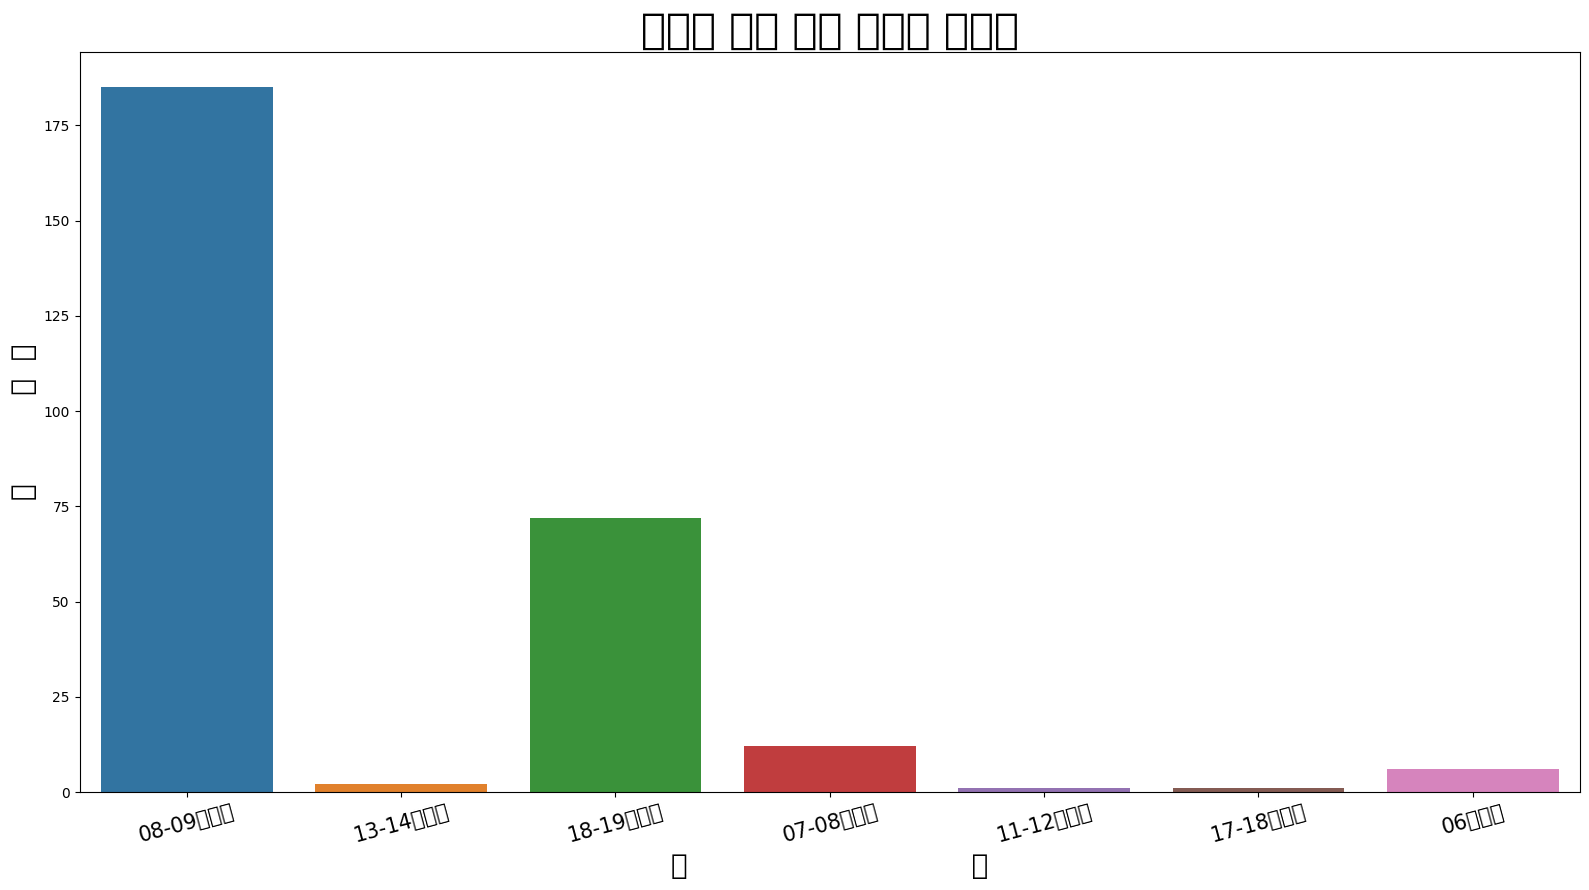

In [30]:
plt.figure(figsize=(16,9))
ax = sns.countplot(data=normal_st, x='붐비는 시간대')
plt.xticks(size=15, rotation=15)
ax.set_xlabel('시                                간', size=20)
ax.set_ylabel('역          개  수', size=20)
ax.set_title('지하철 역사 가장 붐비는 시간대', size=30)
plt.tight_layout()

In [136]:
normal_st.head()

,호선,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,12-13시간대,13-14시간대,...,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,붐비는 시간대
역명,,,,,,,,,,,,,,,,,,,,,
동대문,1호선,558.02,599.80,1038.73,1612.10,1440.70,1252.83,1328.87,1415.67,1379.77,...,1449.12,1481.90,1530.12,1236.68,914.23,834.79,721.46,461.79,112.14,08-09시간대
동묘앞,1호선,150.77,302.37,607.29,1239.22,858.07,798.83,1064.73,1314.52,1657.76,...,1511.57,1389.46,1052.97,590.29,382.01,362.12,336.00,191.71,72.94,13-14시간대
서울역,1호선,617.25,2244.77,6053.31,12081.51,7896.07,4494.61,4458.52,4911.85,4970.35,...,6040.04,9008.20,11932.63,5984.66,4065.60,4012.83,2693.46,1284.35,202.06,08-09시간대
시청,1호선,266.13,1015.52,3226.61,8970.75,4146.90,1972.86,2006.69,1891.03,2062.31,...,2630.87,4307.15,7706.30,2699.19,2137.18,2094.90,1389.69,523.04,52.56,08-09시간대
신설동,1호선,430.28,690.15,1837.15,3725.92,2028.66,1314.26,1245.28,1248.11,1342.95,...,1736.27,2335.33,3293.61,1586.92,1022.75,934.12,739.38,427.20,88.06,08-09시간대


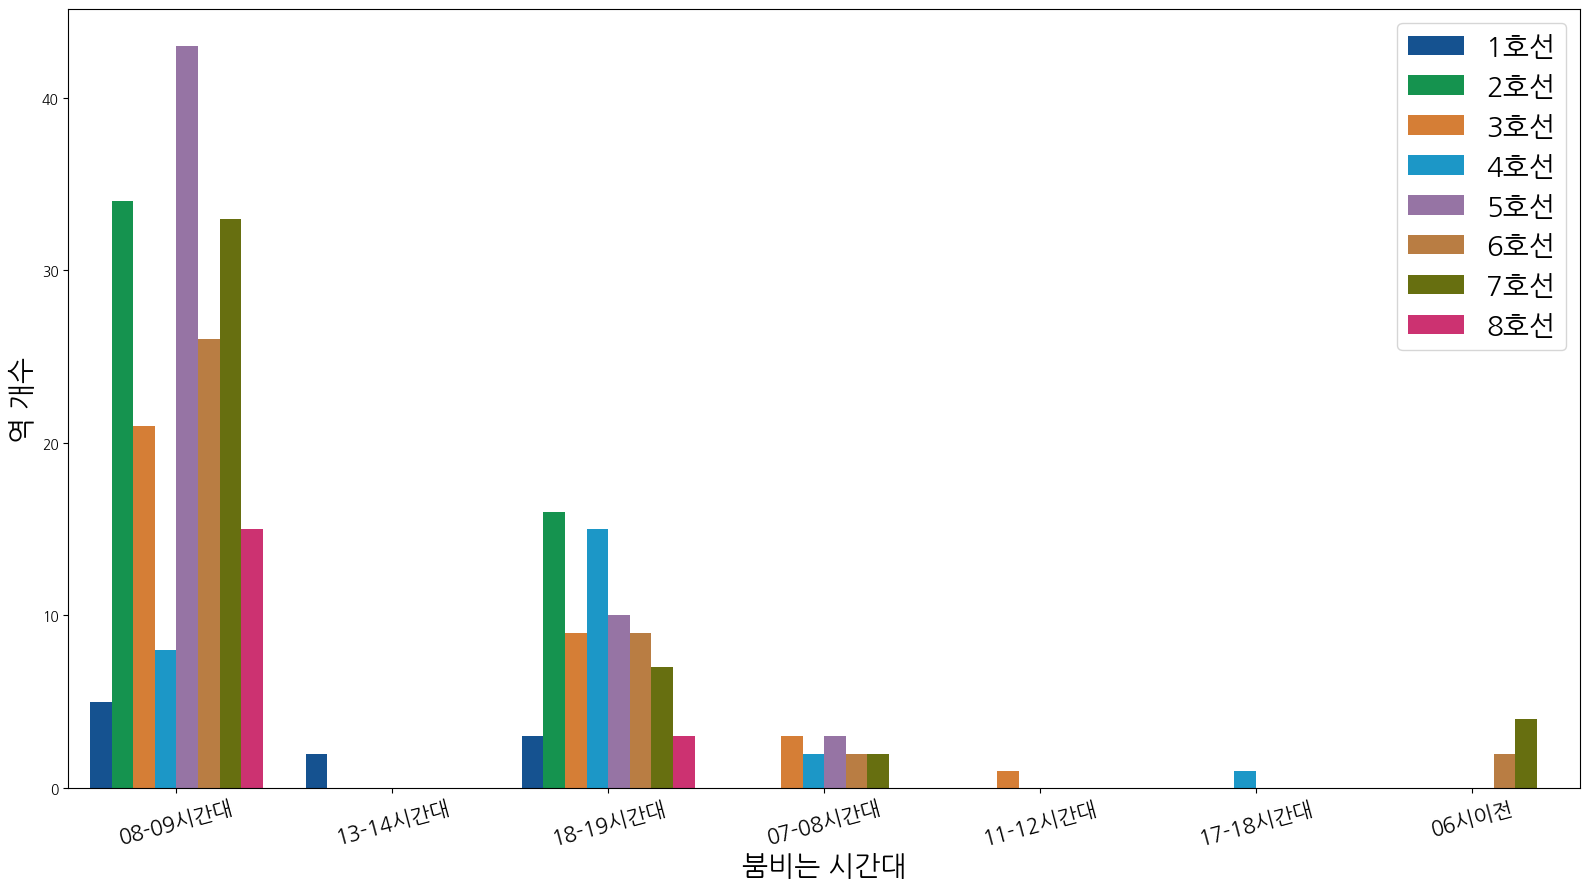

In [138]:
line_colors = {
    '1호선': '#0052A4',
    '2호선': '#00A84D',
    '3호선': '#EF7C1C',
    '4호선': '#00A4E3',
    '5호선': '#996CAC',
    '6호선': '#CD7C2F',
    '7호선': '#747F00',
    '8호선': '#E6186C'
}

palette = [line_colors[line] for line in normal_st['호선'].unique()]
plt.figure(figsize=(16,9))
ax = sns.countplot(data=normal_st, x='붐비는 시간대', hue='호선', palette=palette)
plt.xticks(size=15, rotation=15)
ax.set_xlabel('붐비는 시간대', size=20)
ax.set_ylabel('역 개수', size=20)
# ax.set_title('노선별 가장 붐비는 시간대 집계', size=30)
plt.legend(prop={'size': 20})
plt.tight_layout()

# 커넬 -> plotly_dev

In [31]:
import plotly.graph_objects as go
import plotly.express as px

In [41]:
normal_st = normal_st.reset_index()
normal_st

,역명,호선,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,12-13시간대,...,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,붐비는 시간대
0,동대문,1호선,558.02,599.80,1038.73,1612.10,1440.70,1252.83,1328.87,1415.67,...,1449.12,1481.90,1530.12,1236.68,914.23,834.79,721.46,461.79,112.14,08-09시간대
1,동묘앞,1호선,150.77,302.37,607.29,1239.22,858.07,798.83,1064.73,1314.52,...,1511.57,1389.46,1052.97,590.29,382.01,362.12,336.00,191.71,72.94,13-14시간대
2,서울역,1호선,617.25,2244.77,6053.31,12081.51,7896.07,4494.61,4458.52,4911.85,...,6040.04,9008.20,11932.63,5984.66,4065.60,4012.83,2693.46,1284.35,202.06,08-09시간대
3,시청,1호선,266.13,1015.52,3226.61,8970.75,4146.90,1972.86,2006.69,1891.03,...,2630.87,4307.15,7706.30,2699.19,2137.18,2094.90,1389.69,523.04,52.56,08-09시간대
4,신설동,1호선,430.28,690.15,1837.15,3725.92,2028.66,1314.26,1245.28,1248.11,...,1736.27,2335.33,3293.61,1586.92,1022.75,934.12,739.38,427.20,88.06,08-09시간대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,신흥,8호선,142.41,328.94,775.53,1081.04,543.08,399.00,387.42,437.95,...,680.50,779.43,1027.07,751.02,462.54,372.99,301.96,185.93,55.41,08-09시간대
275,암사,8호선,597.34,1387.18,3962.90,5411.36,2539.42,1382.53,1244.93,1373.13,...,1843.27,2479.81,3836.77,2948.69,1617.63,1269.36,1280.02,665.75,210.81,08-09시간대
276,잠실(송파구청),8호선,141.46,568.31,1731.25,4019.11,2154.81,1405.38,1470.21,1478.02,...,2100.50,2980.39,4333.01,2227.38,1653.06,1502.36,1167.19,449.84,123.68,18-19시간대
277,장지,8호선,322.50,1180.01,3164.99,4523.72,2394.60,1387.12,1259.31,1386.19,...,2093.84,2908.34,3986.81,2411.67,1641.31,1211.34,1031.39,513.02,134.03,08-09시간대


#### 07-08 시간대, 06이전 시간대에 가장 붐비는 역들을 보면 서울 외곽 지역들. 집이 멀어서 출근을 서두르는 사람들이 많은 것으로 추정

#### 13-14시: 동묘, 제기 // 11-12시:충무로 // 17-18시:동대문 -> 중장년층, 노년층이 많이 찾는 번화가

In [65]:
fig = px.bar(normal_st, x='붐비는 시간대', color='호선', color_discrete_map=line_colors,
             category_orders={'호선': normal_st['호선'].unique()},
             labels={'붐비는 시간대': '붐비는 시간대', '이용인원': '역 개수', '호선': '호선'},
             title='평일 가장 붐비는 시간대',
             template='plotly_white', hover_name='역명')

fig.update_layout(title_x=0.5)

fig

In [49]:
data_hap

,수송일자,호선,고유역번호(외부역코드),역명,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,...,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,총 이용인원,승하차구분
0,2022-05-01,1호선,150,서울역,323,848,1170,1743,2667,3158,...,5757,5245,4844,4253,3838,2654,1045,0,65117,합계
1,2022-05-01,1호선,151,시청,138,317,460,814,1275,2405,...,1757,1608,1141,1072,801,475,243,0,24616,합계
2,2022-05-01,1호선,152,종각,298,322,489,985,1533,1729,...,3984,3570,2682,2402,2172,1299,594,0,40638,합계
3,2022-05-01,1호선,153,종로3가,357,392,334,690,1169,1641,...,2981,2242,1849,1452,1249,901,435,0,34236,합계
4,2022-05-01,1호선,154,종로5가,85,175,263,390,819,1200,...,2085,1574,1285,895,656,371,199,0,23380,합계
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99460,2023-04-30,8호선,2824,단대오거리,180,360,414,621,860,861,...,1005,1060,829,701,702,581,313,45,14028,합계
99461,2023-04-30,8호선,2825,신흥,78,118,170,300,412,419,...,526,580,456,363,328,284,141,23,7125,합계
99462,2023-04-30,8호선,2826,수진,79,162,198,332,453,408,...,467,373,393,306,336,287,148,12,7025,합계
99463,2023-04-30,8호선,2827,모란,67,166,136,202,331,331,...,418,439,410,334,295,254,124,18,6162,합계


In [51]:
st_usage = data_hap.groupby(['호선','역명'], as_index=False)['총 이용인원'].sum()
st_usage

,호선,역명,총 이용인원
0,1호선,동대문,8024011
1,1호선,동묘앞,6971121
2,1호선,서울역,34295304
3,1호선,시청,16752921
4,1호선,신설동,9269269
...,...,...,...
274,8호선,신흥,3383747
275,8호선,암사,12053130
276,8호선,잠실(송파구청),11923053
277,8호선,장지,11482395


In [54]:
usage_by_line = st_usage.groupby('호선')['총 이용인원'].sum().reset_index()
usage_by_line

,호선,총 이용인원
0,1호선,160384422
1,2호선,949304221
2,3호선,358471671
3,4호선,342192437
4,5호선,437956798
5,6호선,229099648
6,7호선,399920273
7,8호선,129587502


In [53]:
fig = go.Figure(data=go.Pie(
    labels=usage_by_line['호선'],
    values=usage_by_line['총 이용인원'],
    textinfo='percent+label',
    marker=dict(colors=[line_colors[line] for line in usage_by_line['호선']])
))

fig.update_layout(
    title='노선별 이용인원 비율',
    title_x=0.5,
    template='plotly_white'
)

fig

In [56]:
normal_st[normal_st['역명'] == '구로디지털단지']['붐비는 시간대']

14    08-09시간대
Name: 붐비는 시간대, dtype: object

In [59]:
weekend_st = weekend.groupby(['호선', '역명'], as_index=False)[['06시이전', '06-07시간대',
       '07-08시간대', '08-09시간대', '09-10시간대', '10-11시간대', '11-12시간대', '12-13시간대',
       '13-14시간대', '14-15시간대', '15-16시간대', '16-17시간대', '17-18시간대', '18-19시간대',
       '19-20시간대', '20-21시간대', '21-22시간대', '22-23시간대', '23-24시간대', '24시이후']].mean()
weekend_st

,호선,역명,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,12-13시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
0,1호선,동대문,227.274336,323.477876,420.867257,685.185841,1014.026549,1342.858407,1640.787611,1886.486726,...,1840.247788,1739.884956,1537.017699,1244.123894,1053.336283,868.778761,753.769912,616.690265,395.061947,57.230088
1,1호선,동묘앞,105.840708,217.876106,285.654867,517.884956,915.132743,1551.362832,2223.628319,2582.362832,...,2815.256637,2307.318584,1673.530973,1022.159292,516.513274,337.539823,299.884956,263.716814,159.256637,56.769912
2,1호선,서울역,468.672566,1452.194690,1792.088496,2725.646018,3955.415929,4285.743363,4818.300885,5758.230088,...,5728.557522,5876.168142,6068.681416,5202.637168,4693.672566,3865.849558,3754.681416,2644.690265,1168.690265,72.230088
3,1호선,시청,151.495575,573.292035,579.327434,950.557522,1230.955752,1415.716814,1922.955752,2121.867257,...,2587.477876,2774.513274,2544.513274,2115.008850,1561.026549,1404.690265,1095.398230,731.575221,298.628319,38.123894
4,1호선,신설동,247.460177,371.106195,465.424779,733.778761,946.973451,1165.716814,1259.911504,1379.743363,...,1409.920354,1447.477876,1358.115044,1183.389381,804.831858,677.194690,671.893805,523.911504,366.442478,60.557522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,8호선,신흥,92.884956,149.469027,179.982301,321.106195,373.079646,377.743363,401.336283,482.557522,...,535.495575,592.362832,575.203540,505.238938,411.415929,336.415929,325.964602,263.044248,132.681416,15.787611
273,8호선,암사,313.530973,508.716814,717.548673,1139.592920,1335.238938,1303.389381,1322.061947,1466.946903,...,1453.761062,1562.398230,1577.345133,1369.097345,1113.654867,1014.769912,911.654867,824.247788,475.212389,55.513274
274,8호선,잠실(송파구청),83.212389,305.371681,427.309735,746.460177,1110.008850,1370.858407,1731.469027,1977.867257,...,2515.221239,2623.265487,2531.876106,2263.362832,1696.176991,1600.247788,1482.938053,1024.946903,397.106195,25.123894
275,8호선,장지,179.831858,496.982301,663.185841,968.221239,1193.601770,1188.530973,1256.070796,1476.716814,...,1619.486726,1770.327434,1782.008850,1629.743363,1192.247788,1018.389381,1040.159292,725.000000,378.699115,3.053097


In [60]:
weekend_st = weekend_st.round(2)
weekend_st

,호선,역명,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,12-13시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
0,1호선,동대문,227.27,323.48,420.87,685.19,1014.03,1342.86,1640.79,1886.49,...,1840.25,1739.88,1537.02,1244.12,1053.34,868.78,753.77,616.69,395.06,57.23
1,1호선,동묘앞,105.84,217.88,285.65,517.88,915.13,1551.36,2223.63,2582.36,...,2815.26,2307.32,1673.53,1022.16,516.51,337.54,299.88,263.72,159.26,56.77
2,1호선,서울역,468.67,1452.19,1792.09,2725.65,3955.42,4285.74,4818.30,5758.23,...,5728.56,5876.17,6068.68,5202.64,4693.67,3865.85,3754.68,2644.69,1168.69,72.23
3,1호선,시청,151.50,573.29,579.33,950.56,1230.96,1415.72,1922.96,2121.87,...,2587.48,2774.51,2544.51,2115.01,1561.03,1404.69,1095.40,731.58,298.63,38.12
4,1호선,신설동,247.46,371.11,465.42,733.78,946.97,1165.72,1259.91,1379.74,...,1409.92,1447.48,1358.12,1183.39,804.83,677.19,671.89,523.91,366.44,60.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,8호선,신흥,92.88,149.47,179.98,321.11,373.08,377.74,401.34,482.56,...,535.50,592.36,575.20,505.24,411.42,336.42,325.96,263.04,132.68,15.79
273,8호선,암사,313.53,508.72,717.55,1139.59,1335.24,1303.39,1322.06,1466.95,...,1453.76,1562.40,1577.35,1369.10,1113.65,1014.77,911.65,824.25,475.21,55.51
274,8호선,잠실(송파구청),83.21,305.37,427.31,746.46,1110.01,1370.86,1731.47,1977.87,...,2515.22,2623.27,2531.88,2263.36,1696.18,1600.25,1482.94,1024.95,397.11,25.12
275,8호선,장지,179.83,496.98,663.19,968.22,1193.60,1188.53,1256.07,1476.72,...,1619.49,1770.33,1782.01,1629.74,1192.25,1018.39,1040.16,725.00,378.70,3.05


In [61]:
weekend_st['붐비는 시간대'] = weekend_st.select_dtypes(include=['int','float']).idxmax(axis=1)
weekend_st

,호선,역명,06시이전,06-07시간대,07-08시간대,08-09시간대,09-10시간대,10-11시간대,11-12시간대,12-13시간대,...,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후,붐비는 시간대
0,1호선,동대문,227.27,323.48,420.87,685.19,1014.03,1342.86,1640.79,1886.49,...,1739.88,1537.02,1244.12,1053.34,868.78,753.77,616.69,395.06,57.23,13-14시간대
1,1호선,동묘앞,105.84,217.88,285.65,517.88,915.13,1551.36,2223.63,2582.36,...,2307.32,1673.53,1022.16,516.51,337.54,299.88,263.72,159.26,56.77,14-15시간대
2,1호선,서울역,468.67,1452.19,1792.09,2725.65,3955.42,4285.74,4818.30,5758.23,...,5876.17,6068.68,5202.64,4693.67,3865.85,3754.68,2644.69,1168.69,72.23,17-18시간대
3,1호선,시청,151.50,573.29,579.33,950.56,1230.96,1415.72,1922.96,2121.87,...,2774.51,2544.51,2115.01,1561.03,1404.69,1095.40,731.58,298.63,38.12,16-17시간대
4,1호선,신설동,247.46,371.11,465.42,733.78,946.97,1165.72,1259.91,1379.74,...,1447.48,1358.12,1183.39,804.83,677.19,671.89,523.91,366.44,60.56,16-17시간대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,8호선,신흥,92.88,149.47,179.98,321.11,373.08,377.74,401.34,482.56,...,592.36,575.20,505.24,411.42,336.42,325.96,263.04,132.68,15.79,16-17시간대
273,8호선,암사,313.53,508.72,717.55,1139.59,1335.24,1303.39,1322.06,1466.95,...,1562.40,1577.35,1369.10,1113.65,1014.77,911.65,824.25,475.21,55.51,17-18시간대
274,8호선,잠실(송파구청),83.21,305.37,427.31,746.46,1110.01,1370.86,1731.47,1977.87,...,2623.27,2531.88,2263.36,1696.18,1600.25,1482.94,1024.95,397.11,25.12,16-17시간대
275,8호선,장지,179.83,496.98,663.19,968.22,1193.60,1188.53,1256.07,1476.72,...,1770.33,1782.01,1629.74,1192.25,1018.39,1040.16,725.00,378.70,3.05,17-18시간대


In [66]:
fig = px.bar(weekend_st, x='붐비는 시간대', color='호선', color_discrete_map=line_colors,
             category_orders={'호선': normal_st['호선'].unique()},
             labels={'붐비는 시간대': '시                간', 'count': '역 개수', '호선': '호선'},
             title='휴무일 가장 붐비는 시간대',
             template='plotly_white', hover_name='역명')

fig.update_layout(title_x=0.5)

fig